## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data_academic_performance.xlsx')

In [3]:
df.sample(10)

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
8999,SB11201320305550,M,Complete professional education,Complete technique or technology,Technical or professional level employee,Home,Stratum 5,It is not classified by the SISBEN,Four,NaN,...,85,62,66,147,166,78,4,4,4,2
8524,SB11201320259830,M,Incomplete Secundary,Incomplete Secundary,Retired,Home,Stratum 3,It is not classified by the SISBEN,Five,NaN,...,28,88,28,128,142,44,3,2,3,4
832,SB11201220072387,F,0,0,0,Home,Stratum 1,Level 2,Two,NaN,...,88,40,38,88,168,80,5,4,1,2
772,SB11201220063937,F,Complete professional education,Complete professional education,Entrepreneur,Entrepreneur,Stratum 4,It is not classified by the SISBEN,Four,NaN,...,70,96,26,101,176,88,5,4,4,4
9611,SB11201320371818,F,Complete professional education,Complete Secundary,Independent,Independent,Stratum 1,Level 1,Three,NaN,...,53,41,55,130,138,37,2,2,4,2
1214,SB11201220143221,M,Complete professional education,Complete Secundary,Independent,Home,Stratum 2,Level 1,Five,NaN,...,4,88,69,88,156,66,4,3,2,2
6461,SB11201320106934,M,Complete professional education,Complete professional education,Independent,Independent,Stratum 2,It is not classified by the SISBEN,Four,NaN,...,100,97,99,201,233,100,5,4,4,4
5343,SB11201320036726,M,Complete professional education,Complete Secundary,Independent professional,Home,Stratum 2,It is not classified by the SISBEN,Four,NaN,...,88,82,18,186,183,93,5,4,2,1
5934,SB11201320072127,M,Not sure,Postgraduate education,Other occupation,Other occupation,Stratum 3,Level 3,Three,NaN,...,95,87,91,178,190,96,5,4,4,2
10785,SB11201320526382,F,Incomplete Secundary,Incomplete Secundary,Independent,Independent,Stratum 2,Level 1,Four,NaN,...,12,49,33,127,128,21,2,1,2,2


In [4]:
df.isnull().sum()

COD_S11                 0
GENDER                  0
EDU_FATHER              0
EDU_MOTHER              0
OCC_FATHER              0
OCC_MOTHER              0
STRATUM                 0
SISBEN                  0
PEOPLE_HOUSE            0
Unnamed: 9          12411
INTERNET                0
TV                      0
COMPUTER                0
WASHING_MCH             0
MIC_OVEN                0
CAR                     0
DVD                     0
FRESH                   0
PHONE                   0
MOBILE                  0
REVENUE                 0
JOB                     0
SCHOOL_NAME             0
SCHOOL_NAT              0
SCHOOL_TYPE             0
MAT_S11                 0
CR_S11                  0
CC_S11                  0
BIO_S11                 0
ENG_S11                 0
Cod_SPro                0
UNIVERSITY              0
ACADEMIC_PROGRAM        0
QR_PRO                  0
CR_PRO                  0
CC_PRO                  0
ENG_PRO                 0
WC_PRO                  0
FEP_PRO     

In [5]:
df.drop(columns=['Unnamed: 9'], inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COD_S11           12411 non-null  object
 1   GENDER            12411 non-null  object
 2   EDU_FATHER        12411 non-null  object
 3   EDU_MOTHER        12411 non-null  object
 4   OCC_FATHER        12411 non-null  object
 5   OCC_MOTHER        12411 non-null  object
 6   STRATUM           12411 non-null  object
 7   SISBEN            12411 non-null  object
 8   PEOPLE_HOUSE      12411 non-null  object
 9   INTERNET          12411 non-null  object
 10  TV                12411 non-null  object
 11  COMPUTER          12411 non-null  object
 12  WASHING_MCH       12411 non-null  object
 13  MIC_OVEN          12411 non-null  object
 14  CAR               12411 non-null  object
 15  DVD               12411 non-null  object
 16  FRESH             12411 non-null  object
 17  PHONE       

In [8]:
missing_saber_pro = df[df['Cod_SPro'].isna() | (df['Cod_SPro'] == '') | (df['Cod_SPro'] == 0)]

print(f"Number of records with missing SABER PRO IDs: {len(missing_saber_pro)}")
print("\nSample of records with missing SABER PRO IDs:")
print(missing_saber_pro.head())

saber11_duplicates = df[df.duplicated(subset=['COD_S11'], keep=False)]
print(f"\nNumber of records with duplicate SABER 11 IDs: {len(saber11_duplicates)}")
if len(saber11_duplicates) > 0:
    print("\nSample of duplicate SABER 11 ID records:")
    print(saber11_duplicates.sort_values('COD_S11').head())

saberpro_duplicates = df[df.duplicated(subset=['Cod_SPro'], keep=False)]
print(f"\nNumber of records with duplicate SABER PRO IDs: {len(saberpro_duplicates)}")
if len(saberpro_duplicates) > 0:
    print("\nSample of duplicate SABER PRO ID records:")
    print(saberpro_duplicates.sort_values('Cod_SPro').head())

def keep_most_recent_record():
    duplicate_mask = df.duplicated(subset=['Cod_SPro'], keep=False)
    duplicates = df[duplicate_mask].copy()
    non_duplicates = df[~duplicate_mask].copy()
    duplicates['S11_Year'] = duplicates['COD_S11'].str[4:8].astype(int)

    keep_rows = []
    for saber_pro_id, group in duplicates.groupby('Cod_SPro'):
        most_recent = group.loc[group['S11_Year'].idxmax()]
        keep_rows.append(most_recent)

    filtered_df = pd.concat([non_duplicates, pd.DataFrame(keep_rows)])

    if 'S11_Year' in filtered_df.columns:
        filtered_df = filtered_df.drop(columns=['S11_Year'])

    return filtered_df
df = keep_most_recent_record()
print(f"Filtered DataFrame shape: {df.shape}")

Number of records with missing SABER PRO IDs: 0

Sample of records with missing SABER PRO IDs:
Empty DataFrame
Columns: [COD_S11, GENDER, EDU_FATHER, EDU_MOTHER, OCC_FATHER, OCC_MOTHER, STRATUM, SISBEN, PEOPLE_HOUSE, INTERNET, TV, COMPUTER, WASHING_MCH, MIC_OVEN, CAR, DVD, FRESH, PHONE, MOBILE, REVENUE, JOB, SCHOOL_NAME, SCHOOL_NAT, SCHOOL_TYPE, MAT_S11, CR_S11, CC_S11, BIO_S11, ENG_S11, Cod_SPro, UNIVERSITY, ACADEMIC_PROGRAM, QR_PRO, CR_PRO, CC_PRO, ENG_PRO, WC_PRO, FEP_PRO, G_SC, PERCENTILE, 2ND_DECILE, QUARTILE, SEL, SEL_IHE]
Index: []

[0 rows x 44 columns]

Number of records with duplicate SABER 11 IDs: 0

Number of records with duplicate SABER PRO IDs: 32

Sample of duplicate SABER PRO ID records:
               COD_S11 GENDER                             EDU_FATHER  \
6524  SB11201320110284      M  Incomplete technical or technological   
2259  SB11201220313289      M                                      0   
8035  SB11201320225581      F      Incomplete Professional Education   

In [9]:
df.rename(columns={'MAT_S11': 'Math_S11',
                   'CR_S11': 'Critical Reading_S11',
                   'CC_S11': 'Citizen Competencies_S11',
                   'BIO_S11': 'Biology_S11',
                   'ENG_S11': 'English_S11',
                   'QR_PRO': 'Quantitative Reasoning_PRO',
                   'CR_PRO': 'Critical Reading_PRO',
                   'CC_PRO': 'Citizen Competencies_PRO',
                   'ENG_PRO': 'English_PRO',
                   'WC_PRO': 'Written Communication_PRO',
                   'FEP_PRO': 'Formulation of Engineering Projects_PRO',
                   'SEL': 'Socioeconomic Level',
                   'SEL_IHE': 'Socioeconomic Level of The Institution of Higher Education'}, inplace=True)

In [10]:
df.describe()

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,Socioeconomic Level,Socioeconomic Level of The Institution of Higher Education
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,64.326261,60.782896,60.709238,63.958935,61.804599,77.419766,62.214603,59.200726,67.504316,53.723921,145.495200,162.724002,68.461880,3.886325,3.189351,2.598790,2.409359
std,11.876539,10.026175,10.121873,11.155950,14.300620,22.678590,27.657494,28.989655,25.488274,29.993318,40.131322,23.109625,25.862181,1.248166,0.978822,1.111929,0.926930
min,26.000000,24.000000,0.000000,11.000000,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,56.000000,54.000000,54.000000,56.000000,50.000000,65.000000,42.000000,36.000000,51.000000,28.000000,124.000000,147.000000,51.000000,3.000000,3.000000,2.000000,2.000000
50%,64.000000,61.000000,60.000000,64.000000,59.000000,85.000000,67.000000,65.000000,74.000000,56.000000,153.000000,163.000000,75.000000,4.000000,4.000000,2.000000,2.000000
75%,72.000000,67.000000,67.000000,71.000000,72.000000,96.000000,86.000000,85.000000,88.000000,80.000000,174.000000,179.000000,90.000000,5.000000,4.000000,4.000000,3.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,247.000000,100.000000,5.000000,4.000000,4.000000,4.000000


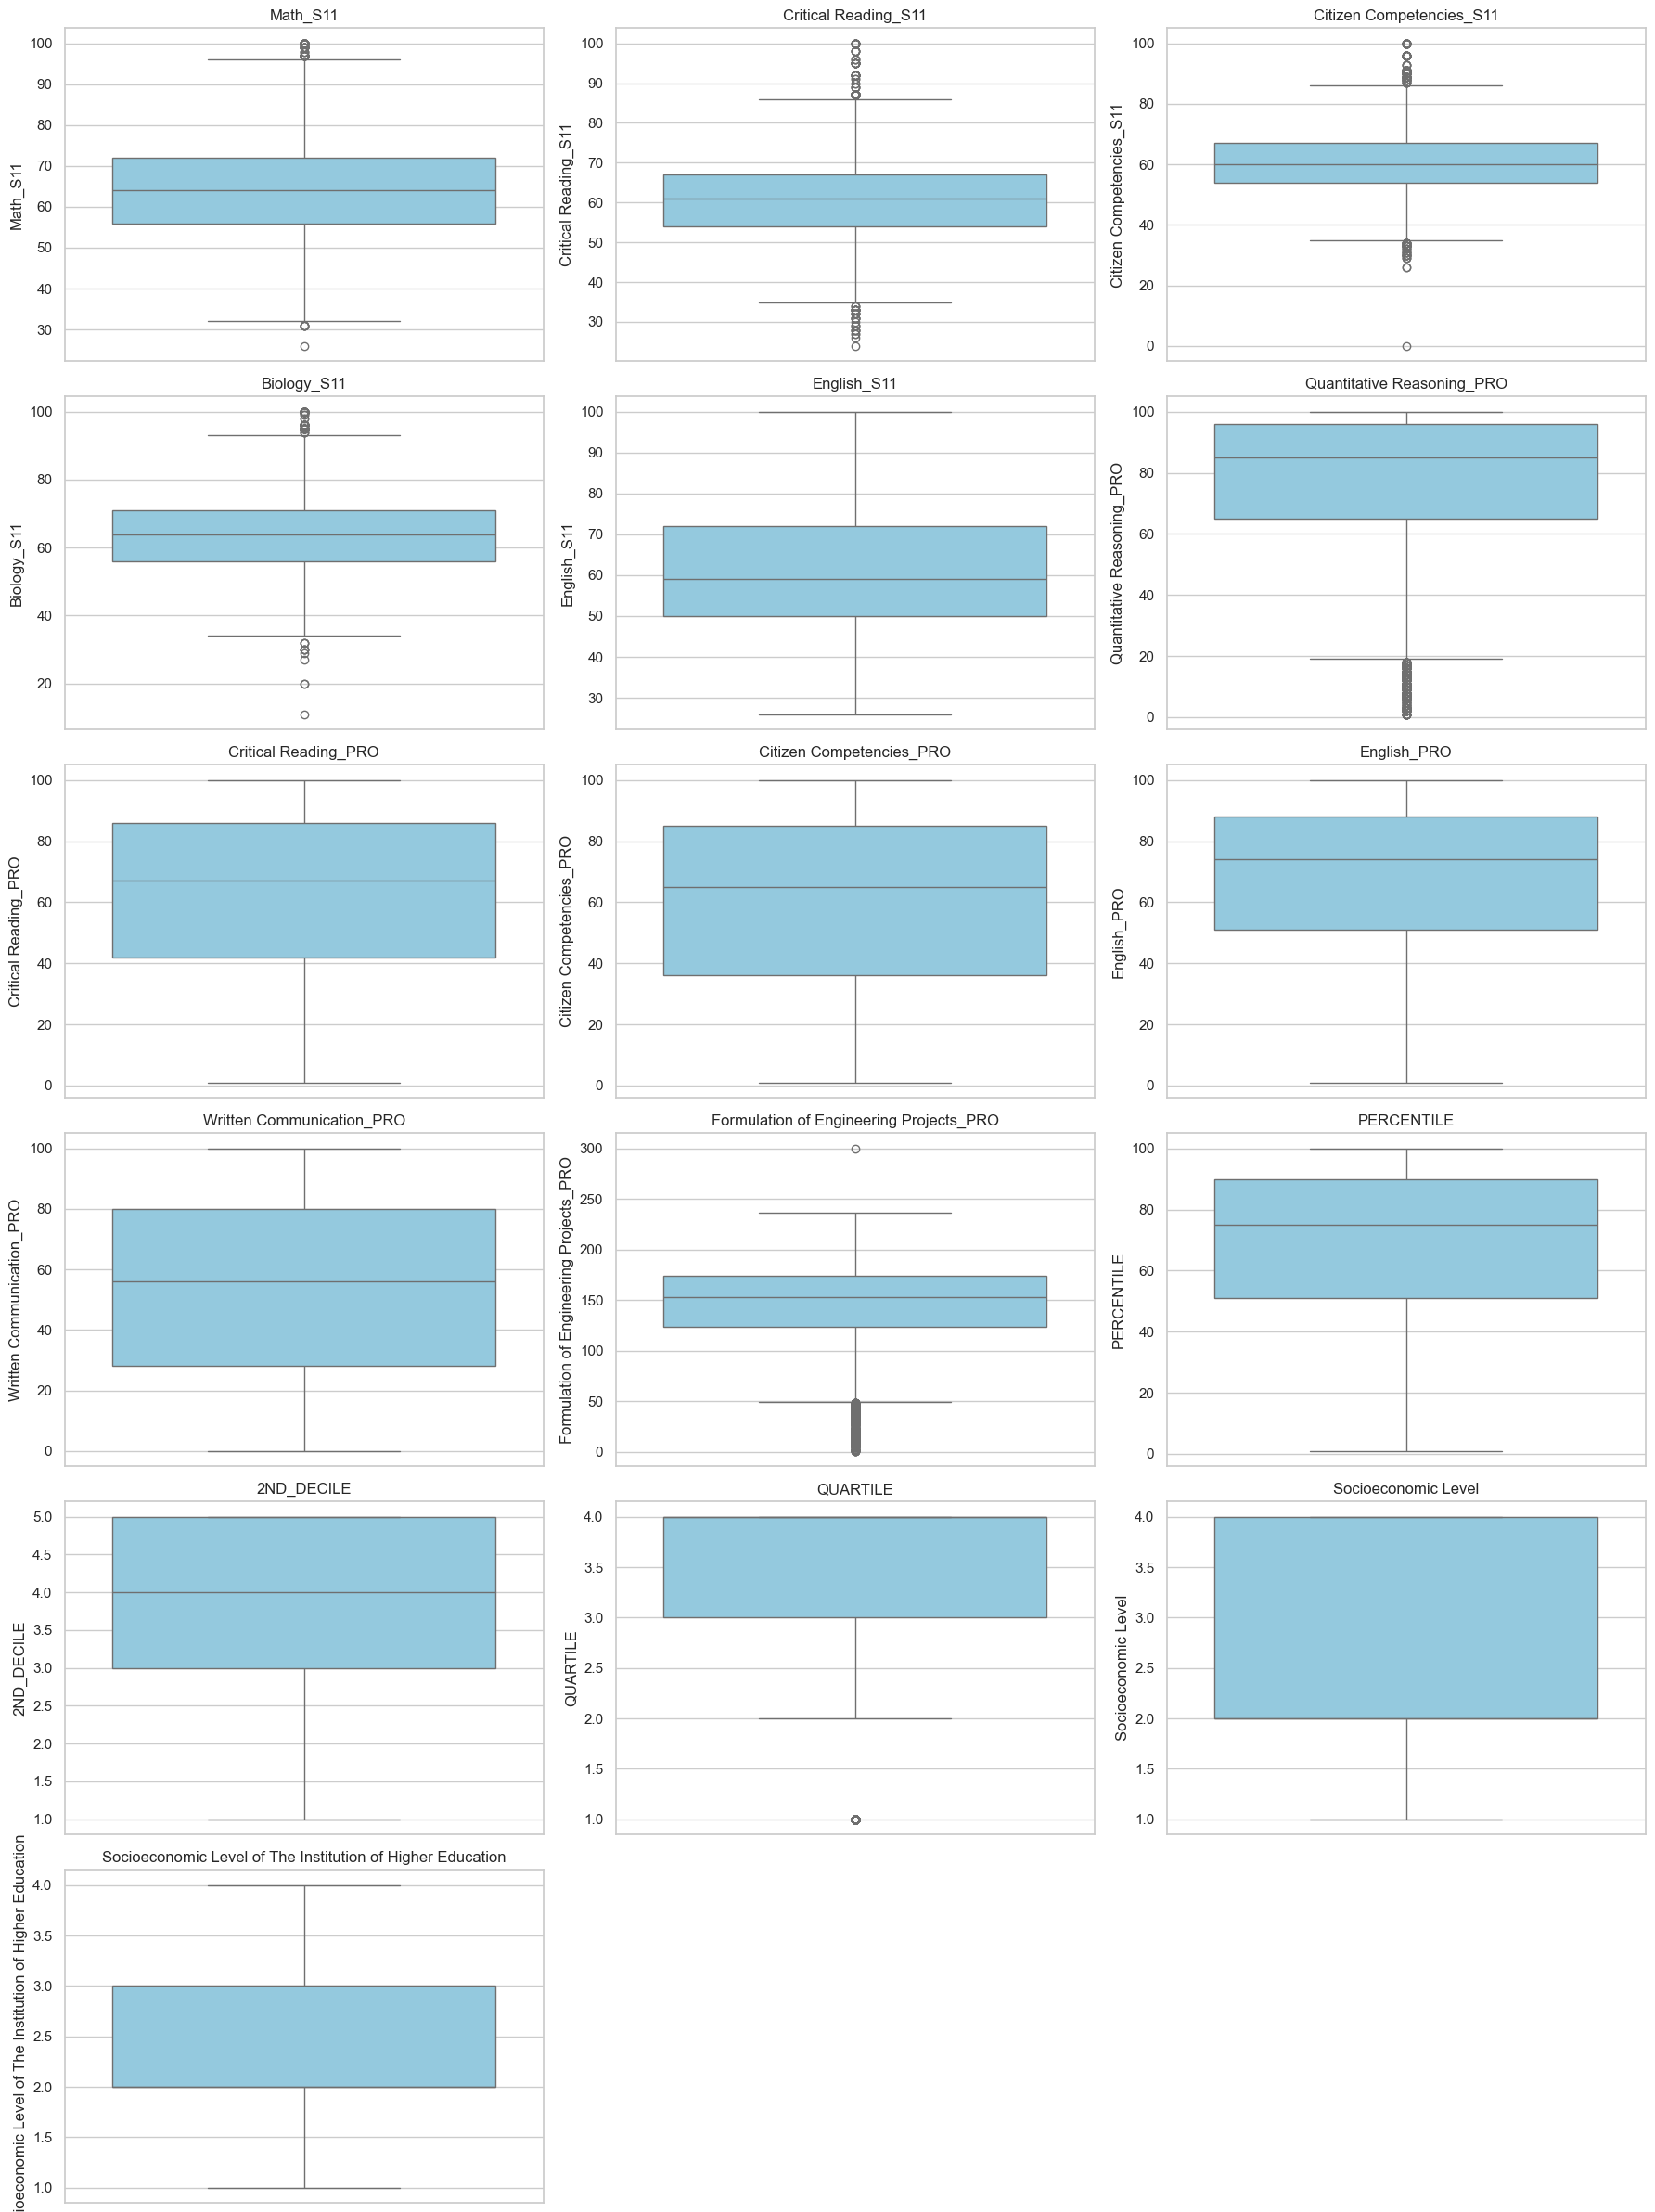

In [11]:
numeric_columns = [
    "Math_S11", "Critical Reading_S11", "Citizen Competencies_S11", "Biology_S11", "English_S11",
    "Quantitative Reasoning_PRO", "Critical Reading_PRO", "Citizen Competencies_PRO", "English_PRO",
    "Written Communication_PRO", "Formulation of Engineering Projects_PRO", "PERCENTILE",
    "2ND_DECILE", "QUARTILE", "Socioeconomic Level",
    "Socioeconomic Level of The Institution of Higher Education"
]

sns.set(style="whitegrid")

def plot_boxplots(df, numeric_columns):
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 2) // 3  # Adjust rows based on number of plots

    plt.figure(figsize=(18, num_rows * 4))

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(data=df, y=col, color="skyblue")
        plt.title(col)
        plt.tight_layout()

    plt.show()

plot_boxplots(df, numeric_columns)


In [12]:
from functools import reduce

def get_unique_value_counts_df(df, columns):
    value_counts_dfs = []

    for col in columns:
        counts_df = (
            df[col]
            .value_counts(dropna=True)
            .reset_index()
            .rename(columns={'index': f'{col}', col: f'{col}_COUNT'})
        )
        value_counts_dfs.append(counts_df)

    merged_df = pd.concat(value_counts_dfs, axis=1)

    return merged_df


In [13]:
columns_to_check = ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER']
nan_counts = df[columns_to_check].isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
EDU_FATHER    0
EDU_MOTHER    0
OCC_FATHER    0
OCC_MOTHER    0
dtype: int64


In [14]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])


,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015,Complete Secundary,3106,Independent,2907,Home,4650
1,Complete Secundary,2842,Complete professional education,3059,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193,Complete technique or technology,1493,Operator,1537,Independent,1107
3,Incomplete Secundary,1091,Incomplete Secundary,1056,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084,Postgraduate education,995,Executive,1076,Executive,793
5,Complete primary,823,Complete primary,712,0,928,Independent professional,715
6,Incomplete primary,731,Incomplete primary,538,Independent professional,914,Operator,684
7,Incomplete Professional Education,425,Incomplete Professional Education,502,Small entrepreneur,692,Other occupation,607
8,Not sure,407,0,380,Retired,532,Small entrepreneur,492
9,0,384,Incomplete technical or technological,341,Entrepreneur,471,0,306


In [15]:
df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip().lower() in ['0', 'not sure'] else x)

df['EDU_FATHER'] = df['EDU_FATHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)
df['EDU_MOTHER'] = df['EDU_MOTHER'].apply(lambda x: 'No Education' if str(x).strip().lower() in ['ninguno', 'ninguno'] else x)

df['OCC_FATHER'] = df['OCC_FATHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)
df['OCC_MOTHER'] = df['OCC_MOTHER'].apply(lambda x: 'Unknown' if str(x).strip() == '0' else x)


In [16]:
get_unique_value_counts_df(df, ['EDU_FATHER', 'EDU_MOTHER', 'OCC_FATHER', 'OCC_MOTHER'])

,EDU_FATHER_COUNT,count,EDU_MOTHER_COUNT,count,OCC_FATHER_COUNT,count,OCC_MOTHER_COUNT,count
0,Complete professional education,3015.0,Complete Secundary,3106.0,Independent,2907,Home,4650
1,Complete Secundary,2842.0,Complete professional education,3059.0,Technical or professional level employee,1802,Technical or professional level employee,1795
2,Complete technique or technology,1193.0,Complete technique or technology,1493.0,Operator,1537,Independent,1107
3,Incomplete Secundary,1091.0,Incomplete Secundary,1056.0,Other occupation,1087,Auxiliary or Administrative,846
4,Postgraduate education,1084.0,Postgraduate education,995.0,Executive,1076,Executive,793
5,Complete primary,823.0,Complete primary,712.0,Unknown,928,Independent professional,715
6,Unknown,791.0,Unknown,559.0,Independent professional,914,Operator,684
7,Incomplete primary,731.0,Incomplete primary,538.0,Small entrepreneur,692,Other occupation,607
8,Incomplete Professional Education,425.0,Incomplete Professional Education,502.0,Retired,532,Small entrepreneur,492
9,Incomplete technical or technological,277.0,Incomplete technical or technological,341.0,Entrepreneur,471,Unknown,306


In [17]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,It is not classified by the SISBEN,7521.0,Stratum 3,4038
1,Level 2,2118.0,Stratum 2,4026
2,Level 1,2056.0,Stratum 1,1707
3,Level 3,583.0,Stratum 4,1575
4,Esta clasificada en otro Level del SISBEN,96.0,Stratum 5,632
5,0,21.0,Stratum 6,403
6,NaN,NaN,0,14


In [18]:
def handle_sisben(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str):
        x = x.strip().lower()
        if x == '0' or 'it is not classified by the sisben' in x or 'esta clasificada en otro level del sisben' in x:
            return 'Unknown'
    return x

def handle_stratum(x):
    if pd.isna(x) or x == 0:
        return 'Unknown'
    if isinstance(x, str) and x.strip() == '0':
        return 'Unknown'
    return x

df['SISBEN'] = df['SISBEN'].apply(handle_sisben)
df['STRATUM'] = df['STRATUM'].apply(handle_stratum)

In [19]:
get_unique_value_counts_df(df, ['SISBEN','STRATUM'])

,SISBEN_COUNT,count,STRATUM_COUNT,count
0,Unknown,7638.0,Stratum 3,4038
1,level 2,2118.0,Stratum 2,4026
2,level 1,2056.0,Stratum 1,1707
3,level 3,583.0,Stratum 4,1575
4,NaN,NaN,Stratum 5,632
5,NaN,NaN,Stratum 6,403
6,NaN,NaN,Unknown,14


In [20]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,0,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,0,276.0,NaN,NaN,NaN,NaN,Nueve,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,Twelve or more,32


In [21]:
df['JOB'] = df['JOB'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )
df['REVENUE'] = df['REVENUE'].apply(
        lambda x: 'Unknown' if (
            (isinstance(x, str) and x.strip() == '0') or
            x == 0 or
            pd.isna(x)
        ) else x
    )

df = df[df['PEOPLE_HOUSE'] != '0']

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Nueve': 'Nine'})

df['PEOPLE_HOUSE'] = df['PEOPLE_HOUSE'].replace({'Once': 'One'})

In [22]:
get_unique_value_counts_df(df, ['REVENUE', 'JOB','SCHOOL_TYPE','PEOPLE_HOUSE'])

,REVENUE_COUNT,count,JOB_COUNT,count,SCHOOL_TYPE_COUNT,count,PEOPLE_HOUSE_COUNT,count
0,Between 1 and less than 2 LMMW,3867.0,No,11901.0,ACADEMIC,7823.0,Four,4763
1,Between 2 and less than 3 LMMW,2782.0,"Yes, less than 20 hours per week",230.0,TECHNICAL/ACADEMIC,3509.0,Five,2867
2,Between 3 and less than 5 LMMW,2235.0,"Yes, 20 hours or more per week",134.0,TECHNICAL,1058.0,Three,2341
3,less than 1 LMMW,1037.0,Unknown,130.0,Not apply,5.0,Six,1088
4,Between 5 and less than 7 LMMW,971.0,NaN,NaN,NaN,NaN,Two,590
5,10 or more LMMW,718.0,NaN,NaN,NaN,NaN,Seven,372
6,Between 7 and less than 10 LMMW,509.0,NaN,NaN,NaN,NaN,Eight,163
7,Unknown,276.0,NaN,NaN,NaN,NaN,Nine,74
8,NaN,NaN,NaN,NaN,NaN,NaN,Ten,52
9,NaN,NaN,NaN,NaN,NaN,NaN,One,32


## Clustring 

In [23]:
features_to_cluster = [
    'Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11',
    'Biology_S11', 'English_S11',
    'Quantitative Reasoning_PRO', 'Critical Reading_PRO',
    'Citizen Competencies_PRO', 'English_PRO', 'Written Communication_PRO',
    'Formulation of Engineering Projects_PRO'
]

 ##### Elbow Method

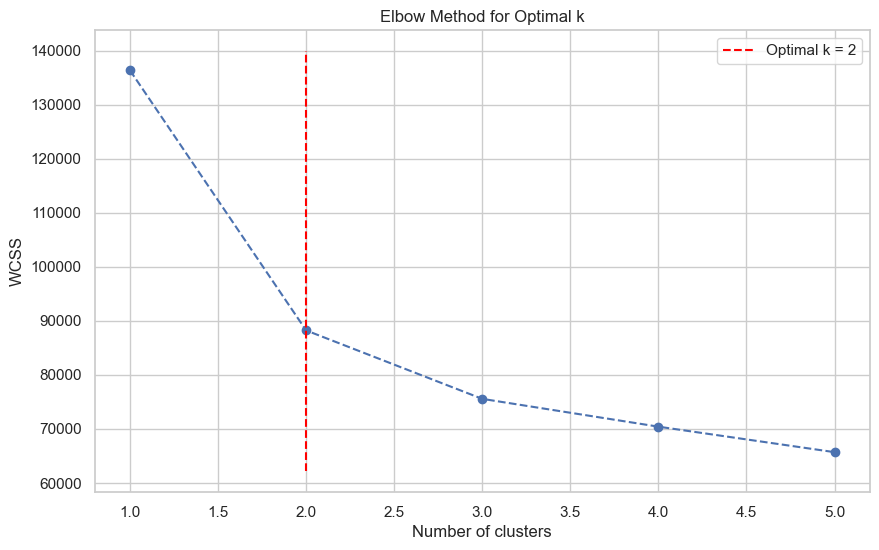

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator  

def find_optimal_clusters(df, features):
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    wcss = []
    K = range(1, 6)
    for i in K:
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    kl = KneeLocator(K, wcss, curve="convex", direction="decreasing")
    optimal_k = kl.elbow

    plt.figure(figsize=(10, 6))
    plt.plot(K, wcss, marker='o', linestyle='--')
    plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label=f'Optimal k = {optimal_k}')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.legend()
    plt.grid(True)
    plt.show()

    return optimal_k
optimal_clusters = find_optimal_clusters(df, features_to_cluster)

##### calinski_harabasz_analysis

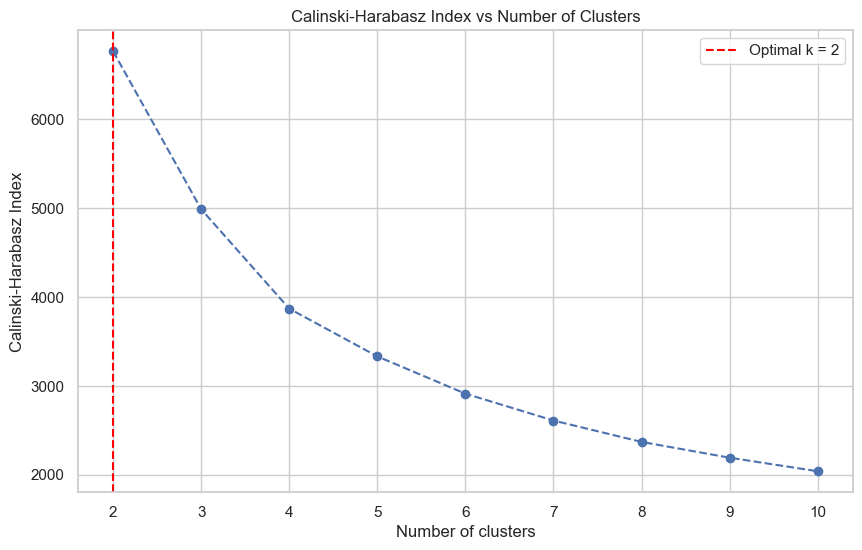

2

In [25]:
from sklearn.metrics import calinski_harabasz_score

def calinski_harabasz_analysis(df, features, max_k=10):
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    ch_scores = []
    K = range(2, max_k + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = calinski_harabasz_score(X_scaled, labels)
        ch_scores.append(score)

    optimal_k = K[np.argmax(ch_scores)]

    plt.figure(figsize=(10, 6))
    plt.plot(K, ch_scores, marker='o', linestyle='--')
    plt.title('Calinski-Harabasz Index vs Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Calinski-Harabasz Index')
    plt.grid(True)
    plt.axvline(optimal_k, color='red', linestyle='dashed', label=f'Optimal k = {optimal_k}')
    plt.legend()
    plt.show()

    return optimal_k
calinski_harabasz_analysis(df,features_to_cluster,max_k=10)

In [26]:
from sklearn.preprocessing import StandardScaler

def perform_kmeans_clustering(df, features, n_clusters):
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    return df
df = perform_kmeans_clustering(df, features_to_cluster, n_clusters=2) 

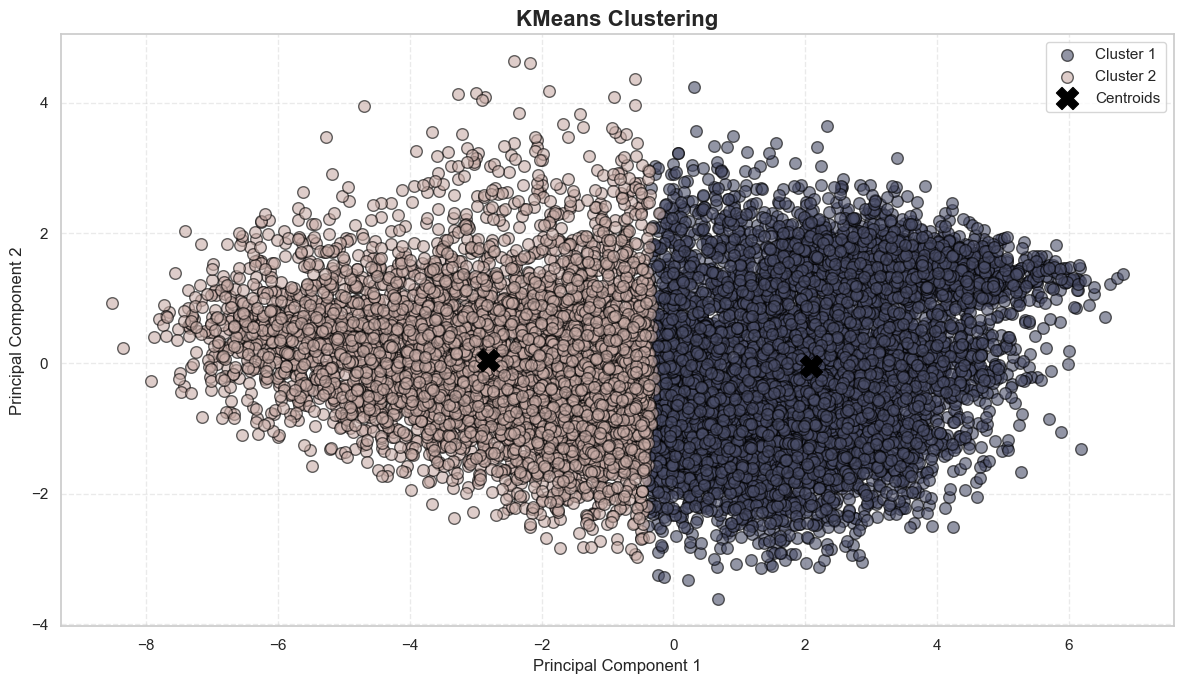

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_kmeans_clusters(df, features, n_clusters):
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    centers_pca = pca.transform(kmeans.cluster_centers_)

    plt.figure(figsize=(12, 7))
    
    custom_colors = ['#4a4e69', '#c9ada7'] 

    for cluster_id in range(n_clusters):
        plt.scatter(
            X_pca[df['Cluster'] == cluster_id, 0],
            X_pca[df['Cluster'] == cluster_id, 1],
            s=70,
            alpha=0.6,
            label=f'Cluster {cluster_id+1}',
            edgecolor='black',
            color=custom_colors[cluster_id]  
        )

    plt.scatter(
        centers_pca[:, 0],
        centers_pca[:, 1],
        c='black',
        s=250,
        marker='X',
        label='Centroids'
    )

    plt.title('KMeans Clustering', fontsize=16, fontweight='bold')
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

visualize_kmeans_clusters(df, numeric_columns, n_clusters=2)


In [28]:
def describe_clusters(df, features):
    cluster_summary = df.groupby('Cluster')[features].mean().round(2)
    cluster_summary['Size'] = df['Cluster'].value_counts().sort_index()
    return cluster_summary

In [29]:
df_summary_=describe_clusters(df,features_to_cluster)

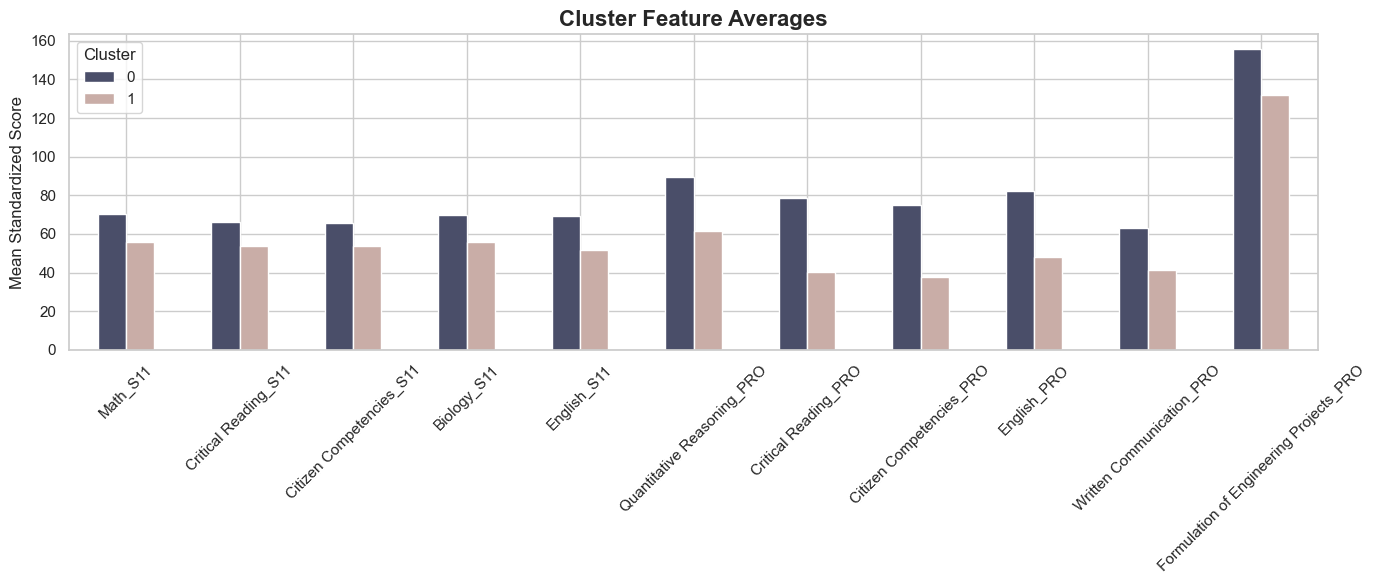

In [30]:
def plot_cluster_profiles(summary_df):
    custom_colors = ['#4a4e69', '#c9ada7']     
    summary_df.drop(columns=['Size'], errors='ignore').T.plot(kind='bar', figsize=(14, 6), color=custom_colors)
    plt.title('Cluster Feature Averages', fontsize=16, fontweight='bold')
    plt.ylabel('Mean Standardized Score')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()
plot_cluster_profiles(df_summary_)

In [31]:
df['S11_std'] = df[['Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11', 'Biology_S11', 'English_S11']].std(axis=1)
df['PRO_std'] = df[['Quantitative Reasoning_PRO', 'Critical Reading_PRO','Citizen Competencies_PRO', 'English_PRO', 'Written Communication_PRO', 'Formulation of Engineering Projects_PRO']].std(axis=1)

df.groupby('Cluster')[['S11_std', 'PRO_std']].mean()

,S11_std,PRO_std
Cluster,,
0,7.482863,38.622600
1,5.836721,42.556434


 Cluster 0 : Represent students who performed better in school (S11) but not as well in PRO tests.

 Cluster 1 : Represent students who did better on PRO standardized tests but had lower S11 scores.

In [32]:
df['S11_mean'] = df[['Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11', 'Biology_S11', 'English_S11']].mean(axis=1)
df['PRO_mean'] = df[['Quantitative Reasoning_PRO', 'Critical Reading_PRO','Citizen Competencies_PRO', 'English_PRO', 'Written Communication_PRO', 'Formulation of Engineering Projects_PRO']].mean(axis=1)
df['progress'] = df['PRO_mean'] - df['S11_mean']

df.groupby('Cluster')['progress'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,7111.0,22.268350,11.225524,-24.666667,15.633333,23.366667,30.300000,75.833333
1,5284.0,5.867619,11.925370,-46.300000,-2.100000,6.400000,14.508333,51.700000


C:\Users\mo\AppData\Local\Temp\ipykernel_13336\1812784343.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette=custom_colors)
C:\Users\mo\AppData\Local\Temp\ipykernel_13336\1812784343.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette=custom_colors)
C:\Users\mo\AppData\Local\Temp\ipykernel_13336\1812784343.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette=custom_colors)
C:\Users\mo\AppData\Local\Temp\ipykernel_13336

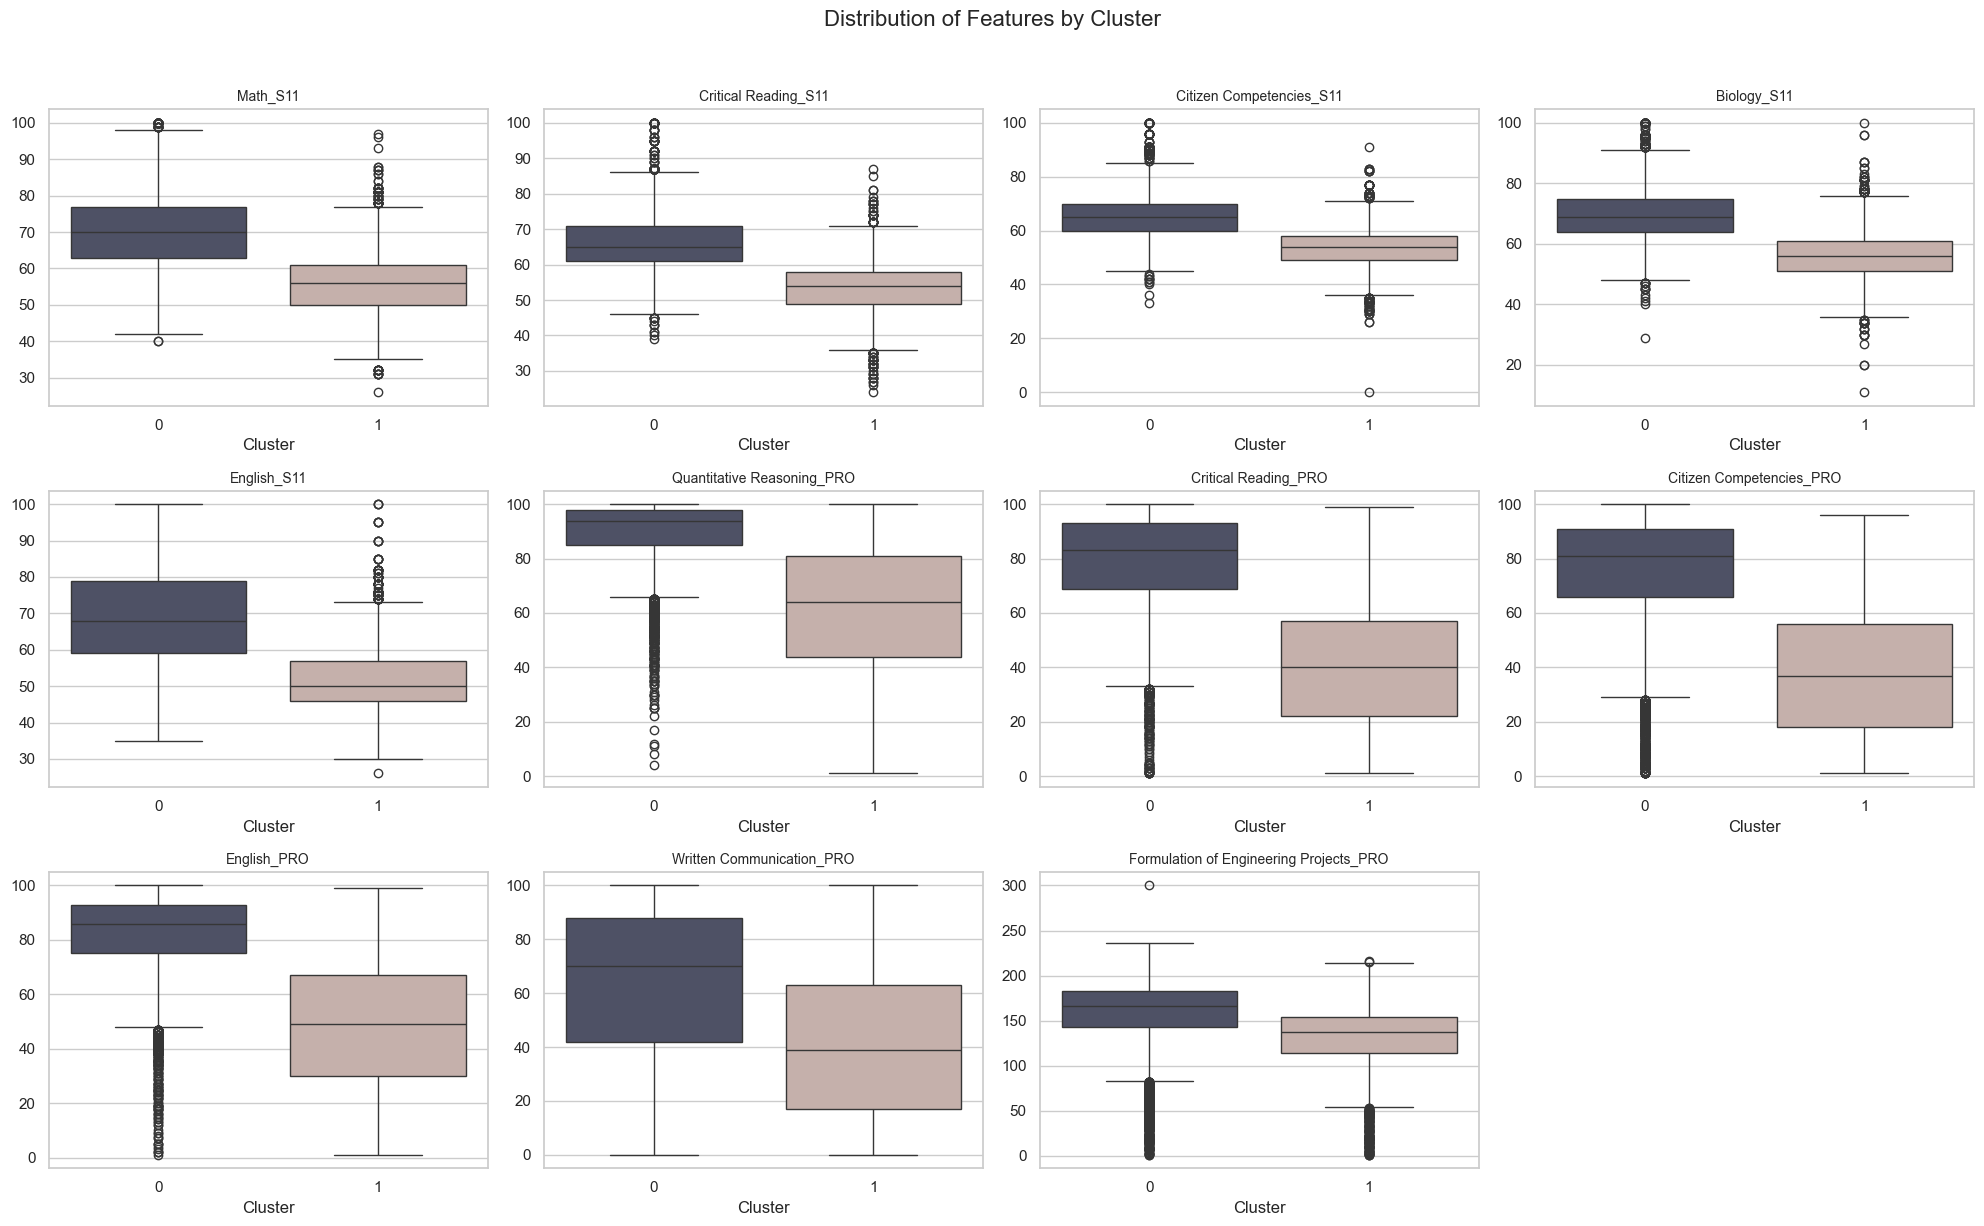

In [33]:
custom_colors = ['#4a4e69', '#c9ada7']  

num_features = len(features_to_cluster)
cols = 4  
rows = -(-num_features // cols)  

plt.figure(figsize=(cols * 5, rows * 4))

for idx, feature in enumerate(features_to_cluster):
    plt.subplot(rows, cols, idx + 1)
    sns.boxplot(data=df, x='Cluster', y=feature, palette=custom_colors)
    plt.title(f'{feature}', fontsize=10)
    plt.xlabel('Cluster')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Distribution of Features by Cluster', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

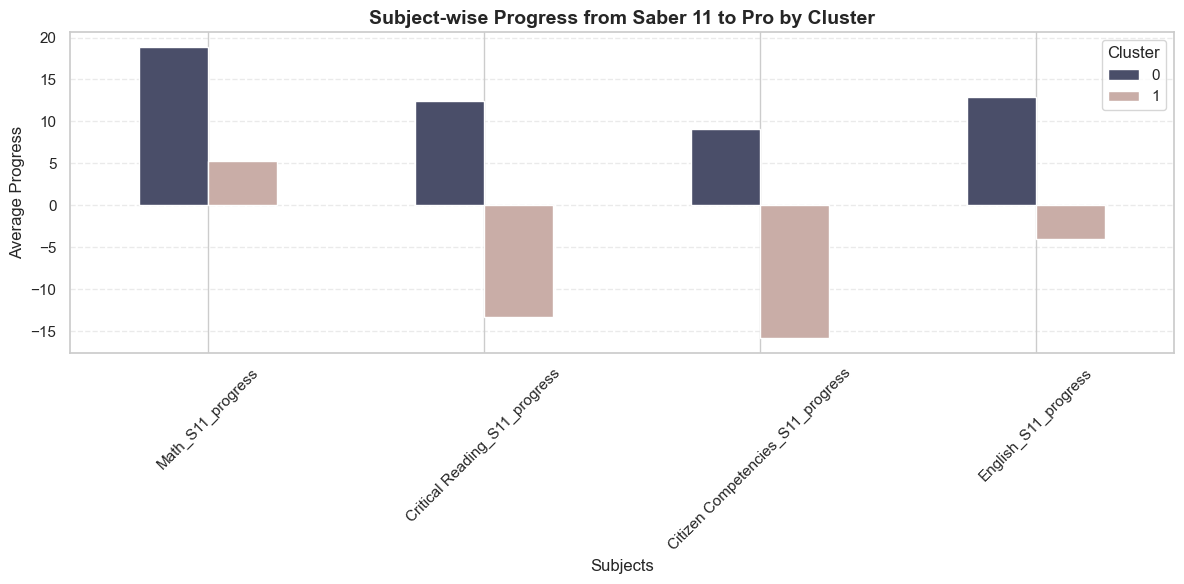

In [34]:
saber_11_features = ['Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11', 'English_S11']
saber_pro_features = ['Quantitative Reasoning_PRO', 'Critical Reading_PRO', 'Citizen Competencies_PRO', 'English_PRO', 'Formulation of Engineering Projects_PRO']

for s11, pro in zip(saber_11_features, saber_pro_features):
    df[f'{s11}_progress'] = df[pro] - df[s11]

progress_cols = [f'{s11}_progress' for s11 in saber_11_features]

custom_colors = ['#4a4e69', '#c9ada7']
df.groupby('Cluster')[progress_cols].mean().T.plot(
    kind='bar',
    figsize=(12, 6),
    color=custom_colors
)

plt.title('Subject-wise Progress from Saber 11 to Pro by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Subjects')
plt.ylabel('Average Progress')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


students in Cluster 0 generally progressed well across all subjects, while students in Cluster 1 improved only in Math and regressed in the other subjects between these two standardized tests

In [ ]:
from scipy.stats import ttest_ind

# Run Welch's t-test
ttest_results = {
    col: ttest_ind(df[df['Cluster'] == 0][col], df[df['Cluster'] == 1][col], equal_var=False)
    for col in saber_11_features + saber_pro_features
}

# Organize the results
ttest_df = pd.DataFrame([
    {
        'Feature': feature,
        'T-Statistic': result.statistic,
        'P-Value': result.pvalue,
        'Significant (p < 0.05)': result.pvalue < 0.05,
        'Cluster 0 Mean': df[df['Cluster'] == 0][feature].mean(),
        'Cluster 1 Mean': df[df['Cluster'] == 1][feature].mean(),
        'Cluster 0 > Cluster 1': df[df['Cluster'] == 0][feature].mean() > df[df['Cluster'] == 1][feature].mean()
    }
    for feature, result in ttest_results.items()
])

ttest_df = ttest_df.sort_values(by='P-Value')
ttest_df


,Feature,T-Statistic,P-Value,Significant (p < 0.05),Cluster 0 Mean,Cluster 1 Mean,Cluster 0 > Cluster 1
0,Math_S11,85.782510,0.000000e+00,True,70.453523,56.080431,True
1,Critical Reading_S11,88.193545,0.000000e+00,True,66.102798,53.623581,True
2,Citizen Competencies_S11,84.905217,0.000000e+00,True,65.922374,53.693603,True
3,English_S11,88.240078,0.000000e+00,True,69.153143,51.915216,True
4,Quantitative Reasoning_PRO,78.451644,0.000000e+00,True,89.336099,61.383232,True
5,Critical Reading_PRO,100.865858,0.000000e+00,True,78.523274,40.267033,True
6,Citizen Competencies_PRO,90.621541,0.000000e+00,True,75.062720,37.854277,True
7,English_PRO,93.111960,0.000000e+00,True,82.089861,47.875662,True
8,Formulation of Engineering Projects_PRO,34.944803,3.143593e-255,True,155.514274,132.011923,True


### TOPSIS

In [36]:
inputs = ['Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11', 'Biology_S11', 'English_S11']
outputs = ['Quantitative Reasoning_PRO', 'Critical Reading_PRO',
           'Citizen Competencies_PRO', 'English_PRO', 'Written Communication_PRO', 'Formulation of Engineering Projects_PRO']

In [37]:
from sklearn.preprocessing import MinMaxScaler

def topsis_alternative(df, inputs, outputs):
    df_proc = df.copy()

    # Normalize
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_proc[inputs + outputs]),
        columns=inputs + outputs,
        index=df_proc.index
    )

    #  Invert inputs for input-orientation
    df_scaled[inputs] = 1 - df_scaled[inputs]

    #  Ideal & nadir
    ideal_best  = df_scaled.max()
    ideal_worst = df_scaled.min()

    #  Distances
    dist_best  = np.linalg.norm(df_scaled - ideal_best, axis=1)
    dist_worst = np.linalg.norm(df_scaled - ideal_worst, axis=1)

    #  TOPSIS score & threshold
    eff_scores   = dist_worst / (dist_best + dist_worst)
    threshold    = eff_scores.mean()
    is_efficient = eff_scores >= threshold

    #  Slack 
    slack_list = []
    global_mins = df_proc[inputs].min()
    for _, row in df_proc[inputs].iterrows():
        slack_list.append((row - global_mins).to_dict())

    result = df_proc[inputs + outputs].copy()
    result['Cluster']   = df_proc['Cluster']
    result['Eff_Score'] = eff_scores
    result['Efficient'] = is_efficient
    # append slacks
    slack_df = pd.DataFrame(slack_list, index=df_proc.index)
    slack_df.columns = [f"{c}_slack" for c in inputs]
    result = pd.concat([result, slack_df], axis=1)

    return result

In [38]:
global_results = topsis_alternative(df, inputs, outputs)
global_results

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,Cluster,Eff_Score,Efficient,Math_S11_slack,Critical Reading_S11_slack,Citizen Competencies_S11_slack,Biology_S11_slack,English_S11_slack
0,71,81,61,86,82,71,93,71,93,79,181,0,0.542133,True,45,57,61,75,56
1,83,75,66,100,88,97,38,86,98,78,201,0,0.512148,False,57,51,66,89,62
2,52,49,38,46,42,17,1,18,43,22,113,1,0.440426,False,26,25,38,35,16
3,56,55,51,64,73,65,35,76,80,48,137,1,0.535730,False,30,31,51,53,47
4,80,65,76,85,92,94,94,98,100,71,189,0,0.558951,True,54,41,76,74,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,45,46,37,51,48,64,10,1,10,9,137,1,0.445113,False,19,22,37,40,22
4424,53,62,51,56,55,73,77,55,64,15,156,1,0.547421,True,27,38,51,45,29
4636,45,41,37,54,49,44,39,23,24,12,110,1,0.470279,False,19,17,37,43,23
11438,55,47,55,48,51,48,35,65,77,15,147,1,0.530374,False,29,23,55,37,25


In [39]:
global_results['Efficient'].value_counts()

Efficient
True     6588
False    5807
Name: count, dtype: int64

In [40]:
cluster_results = pd.concat(
    [
        topsis_alternative(
            df[df['Cluster'] == c].reset_index(drop=True),
            inputs, outputs
        ).assign(Cluster=c)
        for c in df['Cluster'].unique()
    ],
    ignore_index=True
)
cluster_results

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,Cluster,Eff_Score,Efficient,Math_S11_slack,Critical Reading_S11_slack,Citizen Competencies_S11_slack,Biology_S11_slack,English_S11_slack
0,71,81,61,86,82,71,93,71,93,79,181,0,0.573910,False,31,42,28,57,47
1,83,75,66,100,88,97,38,86,98,78,201,0,0.533541,False,43,36,33,71,53
2,80,65,76,85,92,94,94,98,100,71,189,0,0.584206,False,40,26,43,56,57
3,71,60,57,61,82,86,15,32,97,36,170,0,0.523028,False,31,21,24,32,47
4,71,75,61,75,85,68,8,50,92,53,187,0,0.489402,False,31,36,28,46,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12390,45,46,37,51,48,64,10,1,10,9,137,1,0.449895,False,19,22,37,40,22
12391,53,62,51,56,55,73,77,55,64,15,156,1,0.552227,True,27,38,51,45,29
12392,45,41,37,54,49,44,39,23,24,12,110,1,0.474773,False,19,17,37,43,23
12393,55,47,55,48,51,48,35,65,77,15,147,1,0.537928,True,29,23,55,37,25


In [41]:
cluster_results['Efficient'].value_counts()

Efficient
True     6239
False    6156
Name: count, dtype: int64

In [42]:
cluster_results.drop(columns=['Math_S11_slack','Critical Reading_S11_slack','Citizen Competencies_S11_slack','Biology_S11_slack','English_S11_slack','Eff_Score'], inplace=True)

### Compute slacks relative to each cluster’s minimum input

In [43]:
cluster_mins = cluster_results.groupby('Cluster')[inputs].transform('min')
slacks_by_cluster = cluster_results[inputs] - cluster_mins
slacks_by_cluster.columns = [c + '_slack' for c in inputs]

# Combine with your efficiency flags:
eff_with_slack = pd.concat([
    cluster_results[['Cluster','Efficient']],
    slacks_by_cluster
], axis=1)

eff_with_slack

,Cluster,Efficient,Math_S11_slack,Critical Reading_S11_slack,Citizen Competencies_S11_slack,Biology_S11_slack,English_S11_slack
0,0,False,31,42,28,57,47
1,0,False,43,36,33,71,53
2,0,False,40,26,43,56,57
3,0,False,31,21,24,32,47
4,0,False,31,36,28,46,50
...,...,...,...,...,...,...,...
12390,1,False,19,22,37,40,22
12391,1,True,27,38,51,45,29
12392,1,False,19,17,37,43,23
12393,1,True,29,23,55,37,25


Slacks show where and by how much a non-efficient program lags the cluster’s best performers on each SABER 11 competency—giving you concrete targets for improvement.

### Classification


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import pickle

In [45]:
cluster_results

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,Cluster,Efficient
0,71,81,61,86,82,71,93,71,93,79,181,0,False
1,83,75,66,100,88,97,38,86,98,78,201,0,False
2,80,65,76,85,92,94,94,98,100,71,189,0,False
3,71,60,57,61,82,86,15,32,97,36,170,0,False
4,71,75,61,75,85,68,8,50,92,53,187,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12390,45,46,37,51,48,64,10,1,10,9,137,1,False
12391,53,62,51,56,55,73,77,55,64,15,156,1,True
12392,45,41,37,54,49,44,39,23,24,12,110,1,False
12393,55,47,55,48,51,48,35,65,77,15,147,1,True


In [46]:
df_model_random = cluster_results.copy()

In [47]:
df_model_random['Efficient'].value_counts()

Efficient
True     6239
False    6156
Name: count, dtype: int64

In [48]:
feature_cols = [
    'Math_S11', 'Critical Reading_S11', 'Citizen Competencies_S11',
       'Biology_S11', 'English_S11', 'Quantitative Reasoning_PRO',
       'Critical Reading_PRO', 'Citizen Competencies_PRO', 'English_PRO',
       'Written Communication_PRO','Formulation of Engineering Projects_PRO', 'Cluster']

target_col = "Efficient"

In [49]:
df_model_random.isna().sum()

Math_S11                                   0
Critical Reading_S11                       0
Citizen Competencies_S11                   0
Biology_S11                                0
English_S11                                0
Quantitative Reasoning_PRO                 0
Critical Reading_PRO                       0
Citizen Competencies_PRO                   0
English_PRO                                0
Written Communication_PRO                  0
Formulation of Engineering Projects_PRO    0
Cluster                                    0
Efficient                                  0
dtype: int64

In [50]:
df_model_random.dropna(inplace=True)

In [51]:
df_model_random['Efficient'].value_counts()

Efficient
True     6239
False    6156
Name: count, dtype: int64

In [52]:
df_model_random

,Math_S11,Critical Reading_S11,Citizen Competencies_S11,Biology_S11,English_S11,Quantitative Reasoning_PRO,Critical Reading_PRO,Citizen Competencies_PRO,English_PRO,Written Communication_PRO,Formulation of Engineering Projects_PRO,Cluster,Efficient
0,71,81,61,86,82,71,93,71,93,79,181,0,False
1,83,75,66,100,88,97,38,86,98,78,201,0,False
2,80,65,76,85,92,94,94,98,100,71,189,0,False
3,71,60,57,61,82,86,15,32,97,36,170,0,False
4,71,75,61,75,85,68,8,50,92,53,187,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12390,45,46,37,51,48,64,10,1,10,9,137,1,False
12391,53,62,51,56,55,73,77,55,64,15,156,1,True
12392,45,41,37,54,49,44,39,23,24,12,110,1,False
12393,55,47,55,48,51,48,35,65,77,15,147,1,True


In [53]:
cluster_results['Efficient'] = cluster_results['Efficient'].map({True: 1, False: 0})

cluster_results['Efficient'] = cluster_results['Efficient'].astype(int)
print(cluster_results['Efficient'].value_counts())

Efficient
1    6239
0    6156
Name: count, dtype: int64


In [54]:
X = df_model_random[feature_cols]
y = df_model_random[target_col]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


RandomizedSearchCV (Faster – Good for Larger Search Space)

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 4, 6, 8, 10],
    'min_samples_split': randint(2, 10),
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 268}
Best Cross-Validation Accuracy: 0.9064132322320368


### Random forest

In [57]:
model = RandomForestClassifier(n_estimators=268, max_depth=None, random_state=42, min_samples_split = 4)
model.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=4, n_estimators=268, random_state=42)

In [58]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.3f}")

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.90      0.90      1231
        True       0.91      0.90      0.90      1248

    accuracy                           0.90      2479
   macro avg       0.90      0.90      0.90      2479
weighted avg       0.90      0.90      0.90      2479

Accuracy: 0.903
ROC AUC: 0.971


In [59]:
importances = pd.Series(model.feature_importances_, index=feature_cols)
print("\nTop Features:")
print(importances.sort_values(ascending=False).head(10))


Top Features:
Written Communication_PRO                  0.175651
Citizen Competencies_PRO                   0.135509
Math_S11                                   0.102222
Critical Reading_PRO                       0.094771
Formulation of Engineering Projects_PRO    0.088647
Biology_S11                                0.086831
Critical Reading_S11                       0.070308
English_S11                                0.065279
Citizen Competencies_S11                   0.060544
English_PRO                                0.055601
dtype: float64


In [60]:
with open("rf_phase3_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [61]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import learning_curve

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Accuracy Gap (Train - Test): {train_accuracy - test_accuracy:.3f}")


Training Accuracy: 1.000
Test Accuracy: 0.903
Accuracy Gap (Train - Test): 0.097


<Figure size 600x600 with 0 Axes>

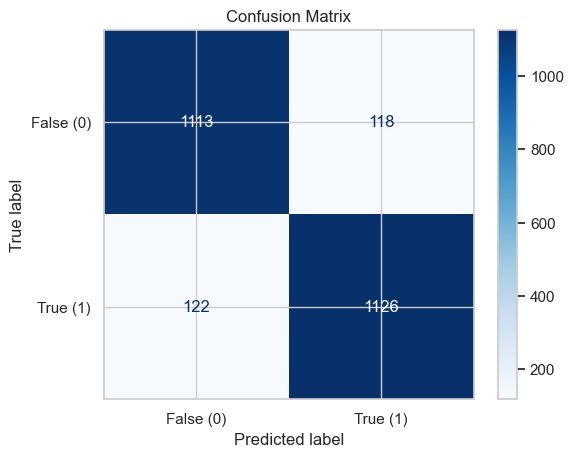

In [62]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False (0)', 'True (1)'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


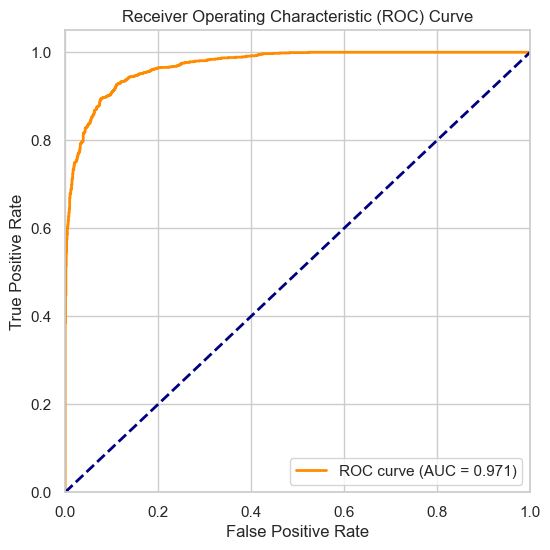

In [63]:
# ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

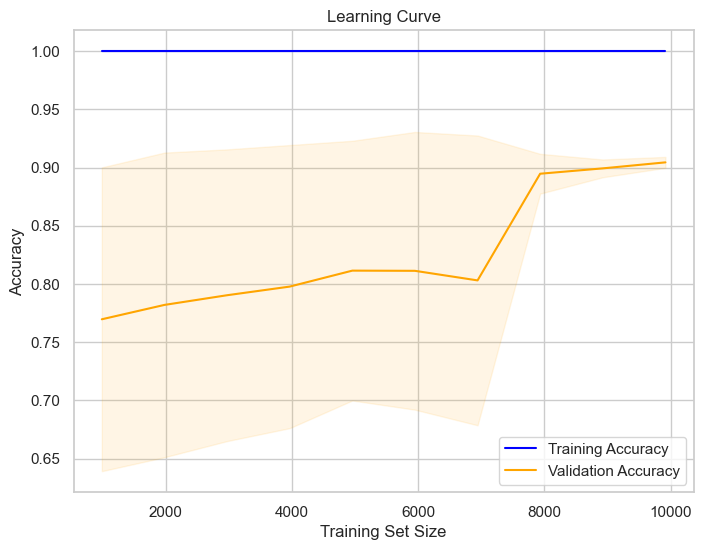

In [64]:
# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, 
                 val_scores_mean + val_scores_std, alpha=0.1, color='orange')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### LightGBM 

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 10, 'min_data_in_leaf': 100, 'n_estimators': 200, 'reg_alpha': 0.0, 'reg_lambda': 0.1}
Best Cross-Validation Score: 0.9532038274080664
Training Accuracy: 1.000
Test Accuracy: 0.956
Accuracy Gap (Train - Test): 0.044


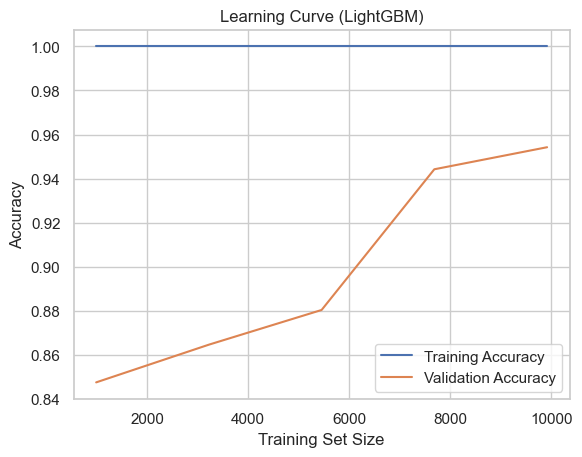

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

X_train_gbm, X_test_gbm, y_train_gbm, y_test_gbm = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [-1, 5, 10],          
    'learning_rate': [0.01, 0.1, 0.3], 
    'n_estimators': [50, 100, 200],     
    'min_data_in_leaf': [20, 50, 100],  
    'reg_lambda': [0.1, 1.0],          
    'reg_alpha': [0.0, 0.1]             
}

lgb_model = LGBMClassifier(random_state=42, verbose=-1)  
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_gbm, y_train_gbm)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_train_gbm_pred = best_model.predict(X_train_gbm)
y_test_gbm_pred = best_model.predict(X_test_gbm)

train_accuracy = accuracy_score(y_train_gbm, y_train_gbm_pred)
test_accuracy = accuracy_score(y_test_gbm, y_test_gbm_pred)
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Accuracy Gap (Train - Test): {train_accuracy - test_accuracy:.3f}")

from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (LightGBM)')
plt.legend()
plt.show()

### LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_scaled, y, test_size=0.3, random_state=40)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'class_weight': [None, 'balanced']
}
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_L, y_train_L)

best_model = grid_search.best_estimator_
y_train_L_pred = best_model.predict(X_train_L)
y_test_L_pred = best_model.predict(X_test_L)

train_accuracy = accuracy_score(y_train_L, y_train_L_pred)
test_accuracy = accuracy_score(y_test_L, y_test_L_pred)
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Accuracy Gap (Train - Test): {train_accuracy - test_accuracy:.3f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Training Accuracy: 0.955
Test Accuracy: 0.952
Accuracy Gap (Train - Test): 0.003


c:\Users\mo\venv310\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
